In [90]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
df = pd.read_csv("/content/wind_dataset.csv")

In [92]:
df.head()

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


In [93]:
df['DATE']=pd.to_datetime(df['DATE'])

In [94]:
df.head()

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


<Axes: xlabel='DATE'>

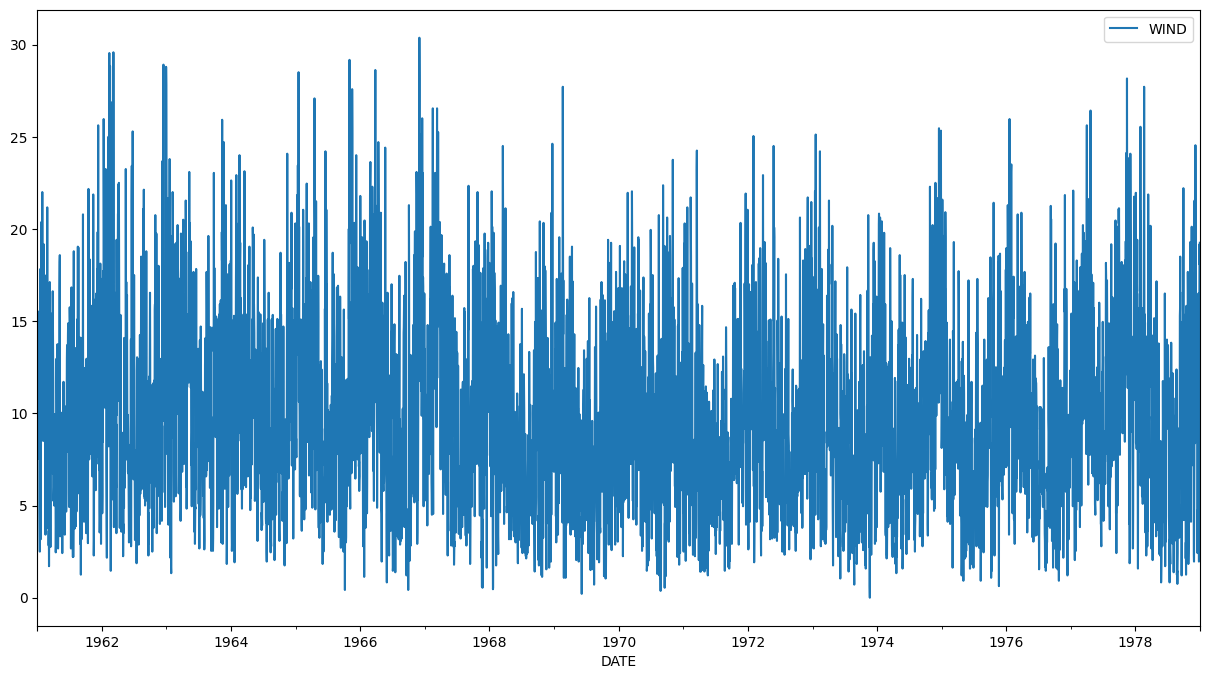

In [10]:
df.plot(x='DATE',y='WIND',figsize=(15,8))

<ipython-input-11-712c7117188d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='kendall'),annot=True, cbar=False, cmap='Blues', fmt='.1f')


<Axes: >

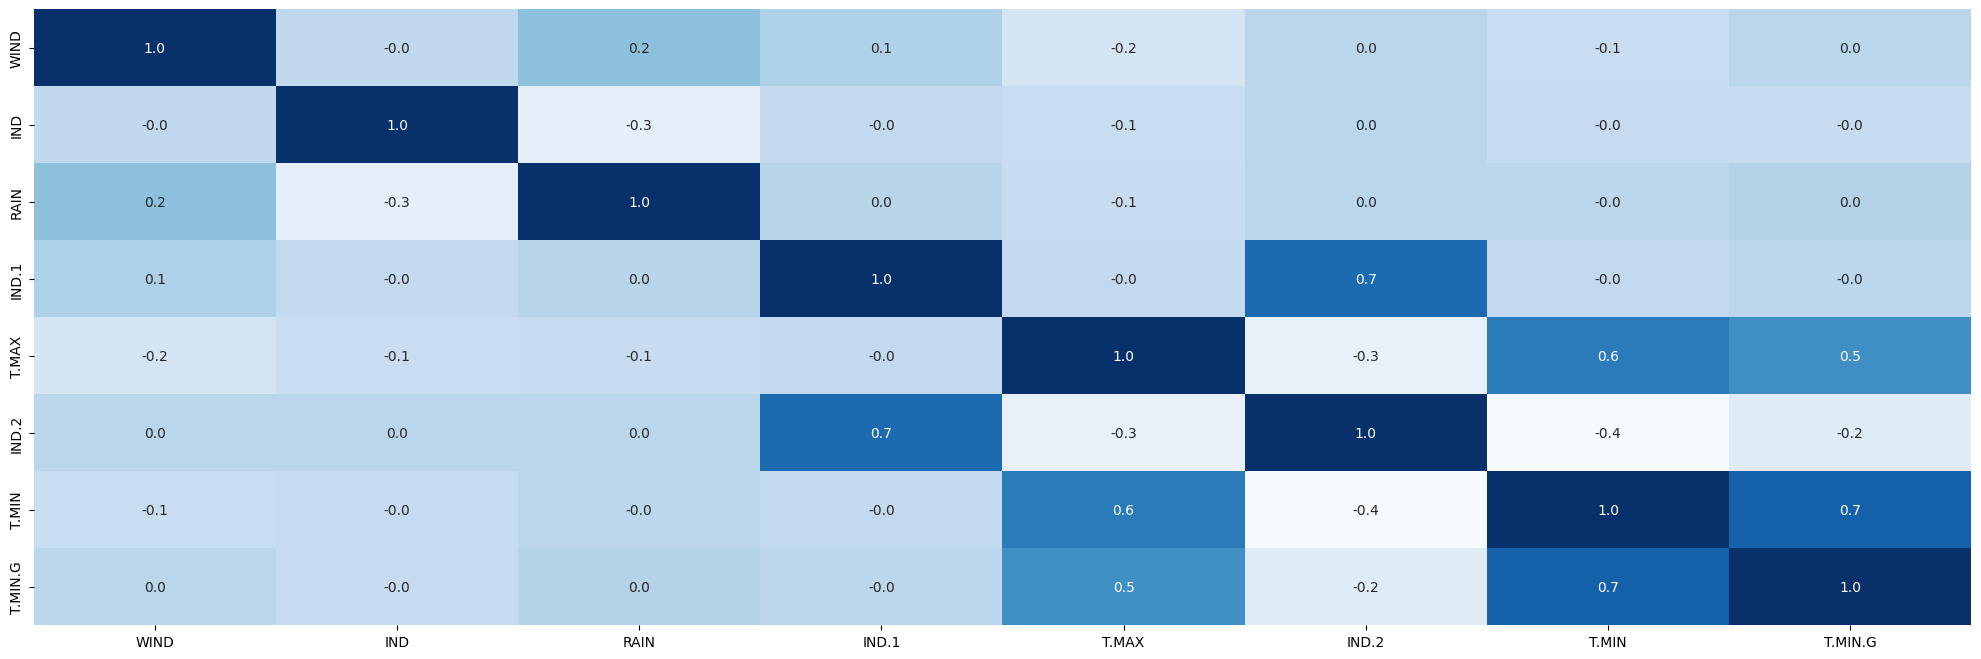

In [11]:
plt.figure(figsize=(25,8))
sns.heatmap(df.corr(method='kendall'),annot=True, cbar=False, cmap='Blues', fmt='.1f')

In [39]:
df=df.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     6574 non-null   datetime64[ns]
 1   WIND     6574 non-null   float64       
 2   IND      6574 non-null   int64         
 3   RAIN     6574 non-null   float64       
 4   IND.1    6574 non-null   float64       
 5   T.MAX    6574 non-null   float64       
 6   IND.2    6574 non-null   float64       
 7   T.MIN    6574 non-null   float64       
 8   T.MIN.G  6574 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 462.4 KB


In [42]:
def df_to_X_y (df,future, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+future]
    y.append(label)
  return np.array(X), np.array(y)

<Axes: >

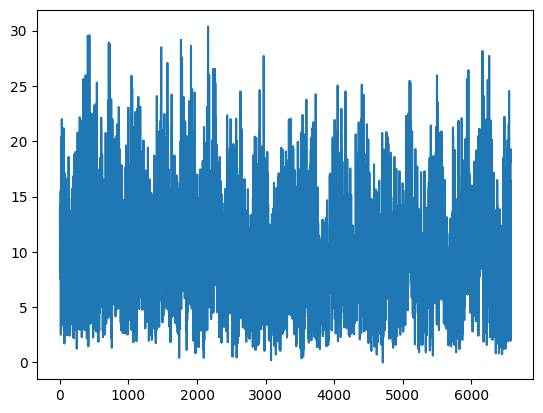

In [43]:
wind = df['WIND']
wind.plot()

In [44]:
df=df.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     6574 non-null   datetime64[ns]
 1   WIND     6574 non-null   float64       
 2   IND      6574 non-null   int64         
 3   RAIN     6574 non-null   float64       
 4   IND.1    6574 non-null   float64       
 5   T.MAX    6574 non-null   float64       
 6   IND.2    6574 non-null   float64       
 7   T.MIN    6574 non-null   float64       
 8   T.MIN.G  6574 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 462.4 KB


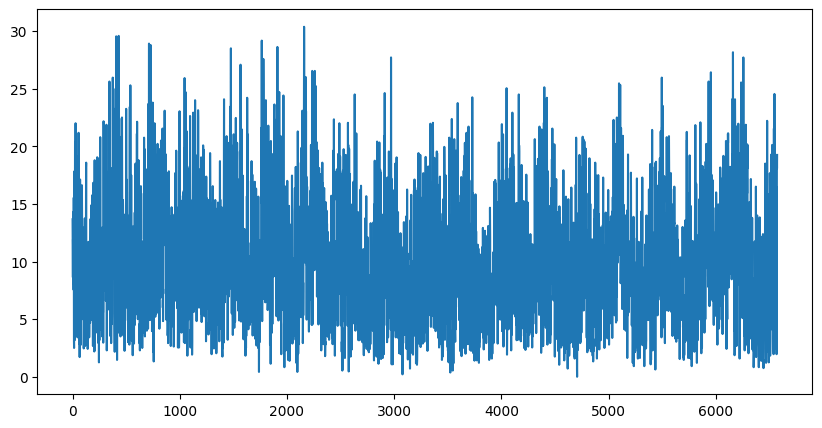

In [45]:
# second Rectify the audio signal
wind_rectified = wind.apply(np.abs)

# Plot the result
wind_rectified.plot(figsize=(10, 5))
plt.show()

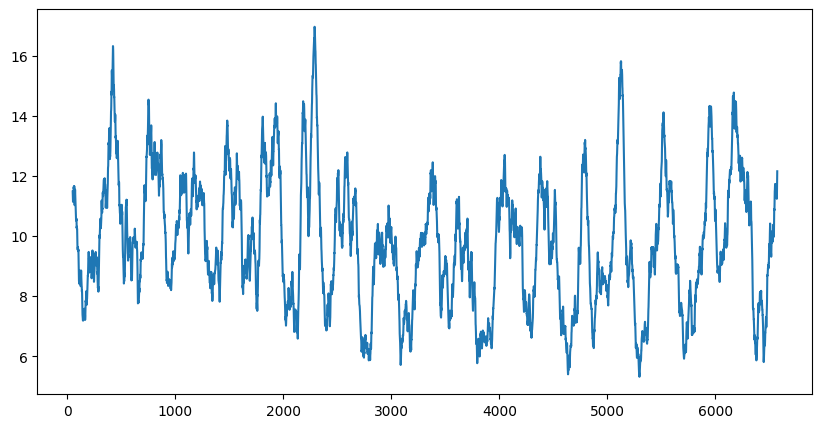

In [46]:
# third Smooth by applying a rolling mean
wind_rectified_smooth = wind_rectified.rolling(50).mean()

# Plot the result
wind_rectified_smooth.plot(figsize=(10, 5))
plt.show()

In [47]:
WINDOW_SIZE = 10
future = 5
X1, y1 = df_to_X_y(wind,future, WINDOW_SIZE)
X1.shape, y1.shape

((6564, 10, 1), (6564,))

In [17]:
WINDOW_SIZE2 = 5
X2, y2 = df_to_X_y(wind_rectified_smooth, WINDOW_SIZE2)
X2.shape, y2.shape

((6569, 5, 1), (6569,))

In [48]:
6569*0.7

4598.299999999999

In [49]:
X_train1, y_train1 = X1[:4600], y1[:4600]
X_val1, y_val1 = X1[4600:5000], y1[4600:5000]
X_test1, y_test1 = X1[5000:], y1[5000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((4600, 10, 1), (4600,), (400, 10, 1), (400,), (1564, 10, 1), (1564,))

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((10, 1)))
model1.add(LSTM(150))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 150)               91200     
                                                                 
 dense_12 (Dense)            (None, 8)                 1208      
                                                                 
 dense_13 (Dense)            (None, 1)                 9         
                                                                 
Total params: 92417 (361.00 KB)
Trainable params: 92417 (361.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [60]:

cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [61]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=20, callbacks=[cp1])

Epoch 1/20
144/144 [==============================] - 8s 42ms/step - loss: 67.5096 - root_mean_squared_error: 8.2164 - val_loss: 19.4285 - val_root_mean_squared_error: 4.4078
Epoch 2/20
144/144 [==============================] - 8s 56ms/step - loss: 21.2998 - root_mean_squared_error: 4.6152 - val_loss: 9.6245 - val_root_mean_squared_error: 3.1023
Epoch 3/20
144/144 [==============================] - 6s 39ms/step - loss: 12.0704 - root_mean_squared_error: 3.4743 - val_loss: 7.6592 - val_root_mean_squared_error: 2.7675
Epoch 4/20
144/144 [==============================] - 7s 48ms/step - loss: 9.9426 - root_mean_squared_error: 3.1532 - val_loss: 6.6658 - val_root_mean_squared_error: 2.5818
Epoch 5/20
144/144 [==============================] - 8s 55ms/step - loss: 8.6408 - root_mean_squared_error: 2.9395 - val_loss: 5.8595 - val_root_mean_squared_error: 2.4206
Epoch 6/20
144/144 [==============================] - 6s 39ms/step - loss: 7.6104 - root_mean_squared_error: 2.7587 - val_loss: 5.4

In [63]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [64]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

144/144 [==============================] - 1s 6ms/step


,Train Predictions,Actuals
0,10.595978,10.67
1,9.059203,9.17
2,12.443803,14.29
3,8.699183,8.04
4,8.917288,11.42
...,...,...
4595,10.418608,11.79
4596,11.338391,12.21
4597,9.077628,7.54
4598,11.907070,15.63


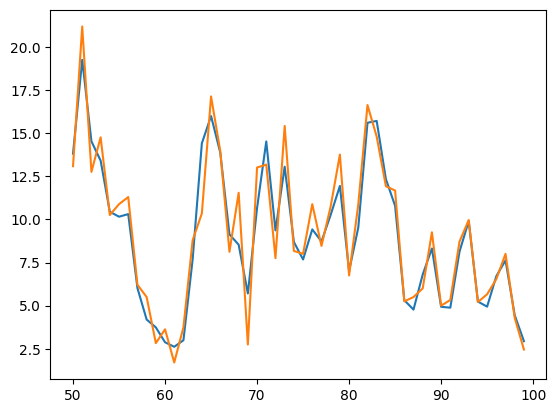

In [65]:

plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [26]:

X2.shape, y2.shape

((6569, 5, 1), (6569,))

In [27]:
X_train2, y_train2 = X2[:4600], y2[:4600]
X_val2, y_val2 = X2[4600:5000], y2[4600:5000]
X_test2, y_test2 = X2[5000:], y2[5000:]
X_train2.shape, y_train2.shape, X_val2.shape, y_val2.shape, X_test2.shape, y_test2.shape

((4600, 5, 1), (4600,), (400, 5, 1), (400,), (1569, 5, 1), (1569,))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               40800     
                                                                 
 dense_4 (Dense)             (None, 8)                 808       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 41617 (162.57 KB)
Trainable params: 41617 (162.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/20
144/144 [==============================] - 4s 13ms/step - loss: nan - root_mean_squared_error: nan - val_loss: nan - val_root_mean_squared_error: nan
Epoch 2/20
144/144 [==============================] - 1s 6ms/step - loss: nan - root_mean_squared_error: nan - val_loss: nan - val_root_mean_squared_error: nan
Epoch 3/20
144/144 [==============================] - 1s 6ms/step - loss: nan - root_mean_squared_error: nan - val_loss: nan - val_root_mean_squared_error: nan
Epoch 4/20
144/144 [==============================] - 1s 6ms/step - loss: nan - root_mean_squared_error: nan - val_loss: nan - val_root_mean_squared_error: nan
Epoch 5/20
144/144 [==============================] - 1s 6ms/step - loss: nan - root_mean_squared_error: nan - val_loss: nan - val_root_mean_squared_error: nan
Epoch 6/20
144/144 [==============================] - 1s 6ms/step - loss: nan - root_mean_squared_error: nan - val_loss: nan - val_root_mean_squared_error: nan
Epoch 7/20
144/144 [===================

In [62]:
df.head()

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


In [66]:
features = df.corr()['WIND'].sort_values()

features

<ipython-input-66-f7b77d41b29f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  features = df.corr()['WIND'].sort_values()


T.MAX     -0.213165
T.MIN     -0.101864
IND       -0.038578
T.MIN.G    0.012076
IND.2      0.048453
IND.1      0.070852
RAIN       0.120876
WIND       1.000000
Name: WIND, dtype: float64

<Axes: >

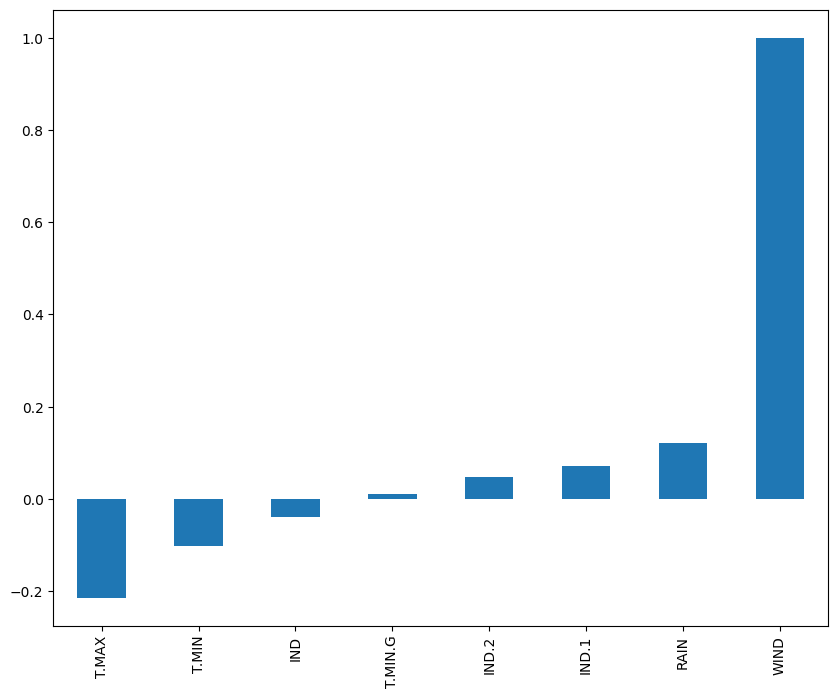

In [67]:
features.plot(kind='bar',figsize=(10,8))

In [109]:
all_df = pd.concat([df['RAIN'],df['IND.1'],df['IND'],df['T.MAX'],df['IND.2'],df['T.MIN'], wind], axis=1)
all_df.head()


,RAIN,IND.1,IND,T.MAX,IND.2,T.MIN,WIND
0,0.2,0.0,0,9.5,0.0,3.7,13.67
1,5.1,0.0,0,7.2,0.0,4.2,11.50
2,0.4,0.0,0,5.5,0.0,0.5,11.25
3,0.2,0.0,0,5.6,0.0,0.4,8.63
4,10.4,0.0,0,7.2,1.0,-1.5,11.92


In [144]:
all_df.isnull().sum()


RAIN       0
IND.1     61
IND        0
T.MAX    621
IND.2     61
T.MIN    674
WIND       0
dtype: int64

In [147]:
all_df = all_df.fillna(0)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RAIN    6574 non-null   float64
 1   IND.1   6574 non-null   float64
 2   IND     6574 non-null   int64  
 3   T.MAX   6574 non-null   float64
 4   IND.2   6574 non-null   float64
 5   T.MIN   6574 non-null   float64
 6   WIND    6574 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 359.6 KB


In [148]:
all_df.isna().sum()


RAIN     0
IND.1    0
IND      0
T.MAX    0
IND.2    0
T.MIN    0
WIND     0
dtype: int64

In [168]:
def df_to_X_y2(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [169]:
WINDOW_SIZE = 10

X3, y3 = df_to_X_y2(all_df,WINDOW_SIZE)
X3.shape, y3.shape

TypeError: ignored

In [151]:
X3_train, y3_train = X3[:4600], y3[:4600]
X3_val, y3_val = X3[4600:5000], y3[4600:5000]
X3_test, y3_test = X3[5000:], y3[5000:]
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape


((4600, 10, 7), (4600, 2), (400, 10, 7), (400, 2), (1564, 10, 7), (1564, 2))

In [152]:
p_training_mean3 = np.mean(X3_train[:, :])
p_training_std3 = np.std(X3_train[:, :])

temp_training_mean3 = np.mean(X3_train[:, :])
temp_training_std3 = np.std(X3_train[:, :])

def preprocess3(X):
  X[:, :] = (X[:, :] - p_training_mean3) / p_training_std3
  X[:, :] = (X[:, :] - temp_training_mean3) / temp_training_std3

def preprocess_output3(y):
  y[:, 0] = (y[:, 0] - p_training_mean3) / p_training_std3
  y[:, 1] = (y[:, 1] - temp_training_mean3) / temp_training_std3
  return y

In [153]:
preprocess3(X3_train)
preprocess3(X3_val)
preprocess3(X3_test)


In [154]:
preprocess_output3(y3_train)
preprocess_output3(y3_val)
preprocess_output3(y3_test)

array([[-0.6581106 , -0.72571999],
       [-0.47218478, -0.72571999],
       [-0.23555192, -0.72571999],
       ...,
       [ 1.75892506, -0.72571999],
       [ 0.10249503, -0.72571999],
       [-0.64120826, -0.72571999]])

In [155]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model3 = Sequential()
model3.add(InputLayer((10,7)))
model3.add(LSTM(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))

model3.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 64)                18432     
                                                                 
 dense_28 (Dense)            (None, 8)                 520       
                                                                 
 dense_29 (Dense)            (None, 1)                 9         
                                                                 
Total params: 18961 (74.07 KB)
Trainable params: 18961 (74.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [156]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [157]:
model3.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=20, callbacks=[cp3])

Epoch 1/20
144/144 [==============================] - 7s 35ms/step - loss: 0.2664 - root_mean_squared_error: 0.5161 - val_loss: 0.2937 - val_root_mean_squared_error: 0.5420
Epoch 2/20
144/144 [==============================] - 1s 10ms/step - loss: 0.2609 - root_mean_squared_error: 0.5107 - val_loss: 0.2950 - val_root_mean_squared_error: 0.5432
Epoch 3/20
144/144 [==============================] - 1s 9ms/step - loss: 0.2598 - root_mean_squared_error: 0.5097 - val_loss: 0.2958 - val_root_mean_squared_error: 0.5439
Epoch 4/20
144/144 [==============================] - 1s 7ms/step - loss: 0.2590 - root_mean_squared_error: 0.5089 - val_loss: 0.2947 - val_root_mean_squared_error: 0.5428
Epoch 5/20
144/144 [==============================] - 1s 7ms/step - loss: 0.2584 - root_mean_squared_error: 0.5083 - val_loss: 0.2939 - val_root_mean_squared_error: 0.5422
Epoch 6/20
144/144 [==============================] - 65s 455ms/step - loss: 0.2583 - root_mean_squared_error: 0.5082 - val_loss: 0.2936 -

In [166]:
train_predictions3 = model3.predict(X3_train).flatten()
train_results3 = pd.DataFrame(data={'Train Predictions':train_predictions3, 'Actuals':y3_train.reshape(-1,1)})
train_results3

144/144 [==============================] - 0s 3ms/step


ValueError: ignored

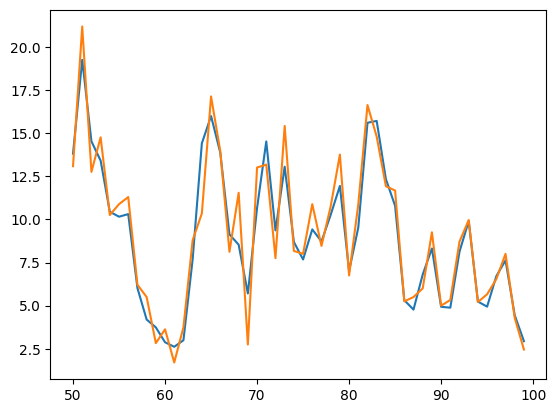

In [159]:
plt.plot(train_results3['Train Predictions'][50:100])
plt.plot(train_results3['Actuals'][50:100])

In [163]:
def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

In [165]:
train_predictions3 = model3.predict(X3_test).flatten()
train_results3 = pd.DataFrame(data={'Train Predictions':train_predictions3, 'Actuals':y3_test})
train_results3

49/49 [==============================] - 0s 4ms/step


ValueError: ignored